## preprocess datafolder 
```
project
|
├── run_your_model.py
|
└─── data
     |
     ├── dataset1
     |   |    data_processed.csv
     |   |    binary_feature.txt
     |   └─── numerical_feature.txt
     |
     ├── dataset2
     |
    ...
```

where the run_your_model.py is the code where you will load the dataset and train your models.

You should put the preprocessed table into data_processed.csv, which is better to follow the protocols:

All the column names to be represented by meaningful natural languge.

All the categorical features to be represented by meaningful natural language.

All the binary features to be represented by 0 or 1.

All the numerical features to be represented by continuous values.

Store the processed table into data_processed.csv.

Store the binary column names into binary_feature.txt. No need to create this file if no binary feature.

Store the numerical column names into numerical_feature.txt. No need to create this file if no numerical feature.

All the other columns will be treated as categorical or textual.

After that, you can try to load the dataset by

transtab.load_data('./data/dataset1')
About dataset_config, an example is provided as
```
EXAMPLE_DATACONFIG = {
    "example": { # dataset name
        "bin": ["bin1", "bin2"], # binary column names
        "cat": ["cat1", "cat2"], # categorical column names
        "num": ["num1", "num2"], # numerical column names
        "cols": ["bin1", "bin2", "cat1", "cat2", "num1", "num2"], # all column names
        "binary_indicator": ["1", "yes", "true", "positive", "t", "y"], # binary indicators in the binary columns, which will be converted to 1
        "data_split_idx": {
            "train":[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], # row indices for training set
            "val":[10, 11, 12, 13, 14, 15, 16, 17, 18, 19], # row indices for validation set
            "test":[20, 21, 22, 23, 24, 25, 26, 27, 28, 29], # row indices for test set
            }
        }
    }
```

In [1]:
from ppp_prediction import transtab
import pandas as pd

In [10]:
from sklearn.model_selection import train_test_split

train_imputed = pd.read_pickle("result/part1/train_imputed.pkl")
test_imputed = pd.read_pickle("result/part1/test_imputed.pkl")

val_imputed = train_imputed.sample(frac=0.2, random_state=0)
train_imputed = train_imputed.drop(val_imputed.index)

proteomics = test_imputed.columns[test_imputed.columns.tolist().index("C3") :].tolist()
risk_factors = [
    "age",
    "sex",
    "ldl_a",
    "hdl_a",
    "tc_a",
    "tg_a",
    "sbp_a",
    "BMI",
    "smoking",
    "prevalent_diabetes",
]

PRS = ["PRS"]

label_col = ["incident_cad"]


train_imputed["type"] = "train"
val_imputed["type"] = "val"
test_imputed["type"] = "test"

total = pd.concat([train_imputed, val_imputed, test_imputed], sort=False).reset_index(
    drop=True
)

total

,eid,PRS,sex,height,weight,BSA,genotype_array,age,PC1,PC2,...,TGFBR3,CRTAC1,IGFBP7,SELE,VWF,NOTCH3,CNTN1,ENG,ICAM2,type
0,1982486.0,1.280734,1.0,163.0,87.6,1.991566,2,61.0,-13.7631,2.255250,...,0.5713,-0.66375,0.7772,0.61930,0.8122,0.79195,0.1486,0.1275,1.5828,train
1,5937359.0,0.443772,0.0,164.0,65.0,1.720788,2,45.0,319.8760,60.192900,...,-0.3107,-0.01385,-0.7731,0.33500,0.6914,0.30975,0.0859,-0.1163,0.3606,train
2,3737374.0,1.262819,0.0,165.0,74.7,1.850338,2,57.0,-10.5337,3.776430,...,-0.0684,0.33475,0.4292,-0.47560,0.7079,-0.11920,-0.3365,0.2564,0.1693,train
3,5525566.0,1.583713,0.0,162.0,67.2,1.738965,1,49.0,-10.8723,0.707374,...,-0.4087,0.01015,-0.2130,0.04605,0.9026,0.04320,0.0767,0.1169,0.1585,train
4,1498921.0,1.708226,0.0,161.0,57.2,1.599410,1,58.0,-13.1336,6.025680,...,-0.4031,-0.26705,-0.2078,-1.42040,0.3638,-0.41190,-0.2133,-0.2530,-1.2798,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51434,5241912.0,1.085083,1.0,176.0,116.0,2.381409,2,45.0,-10.8083,4.462410,...,0.2348,-0.91995,0.8033,0.13160,0.4815,0.27980,-0.2262,0.2626,0.2394,test
51435,3851862.0,1.294348,0.0,169.0,72.9,1.849932,2,40.0,-12.6549,3.400640,...,-0.3290,-0.25125,-0.7874,-0.91900,0.2127,-0.61780,0.1239,-0.1241,-0.9405,test
51436,1144512.0,0.722791,1.0,191.0,96.6,2.263883,1,59.0,-12.7237,1.465470,...,0.1043,-0.28475,0.3503,1.60860,-0.3413,0.13410,-0.0120,0.2267,0.1352,test
51437,1177099.0,1.335307,1.0,175.0,75.1,1.910679,2,63.0,-15.1573,7.366900,...,0.2172,0.17225,0.4313,0.12175,-0.7549,0.53070,0.2440,-0.0189,-0.0534,test


In [11]:
del total["eid"]

In [12]:
from pathlib import Path

transtab_dataset_save_dir = "result/dl/transtab/data/ALL"
Path(transtab_dataset_save_dir).mkdir(parents=True, exist_ok=True)
data = total
label_col = "incident_cad"
total_cols = proteomics + risk_factors + PRS + [label_col]
cat_cols = ["sex", "smoking", "prevalent_diabetes"]
bin_cols = []
num_cols = [
    col for col in proteomics + risk_factors + PRS if col not in cat_cols + bin_cols
]

datasetName = "ALL"


processed_df = data[total_cols + ["type"]].copy()
na_num = processed_df.isna().sum(axis=1) >= 1
print(f"NA rows: {na_num.sum()}")
processed_df = processed_df[~na_num].reset_index(drop=True)

# save train, val, test index
assert "type" in processed_df.columns, "type column not found in processed_df"
train_index = processed_df[processed_df["type"] == "train"].index
val_index = processed_df[processed_df["type"] == "val"].index
test_index = processed_df[processed_df["type"] == "test"].index

dataconfig = {
    "bin": bin_cols,
    "cat": cat_cols,
    "num": num_cols,
    "data_split_idx": {"train": train_index, "val": val_index, "test": test_index},
}
print(total_cols)
# processed_df[total_cols].to_csv(
#     f"{transtab_dataset_save_dir}/data_processed.csv", index=False
# )
processed_df[total_cols].rename(columns={label_col: "target_label"}).to_pickle(
    f"{transtab_dataset_save_dir}/data_processed.pkl"
)

NA rows: 442
['C3', 'KLK7', 'GCHFR', 'NHLRC3', 'APOD', 'GAPDH', 'TP53I3', 'CPA4', 'ANXA2', 'GRSF1', 'IL25', 'HMMR', 'MRPL52', 'PAIP2B', 'THAP12', 'FOS', 'FGF9', 'PITHD1', 'THSD1', 'PTGES2', 'DEFB103A_DEFB103B', 'ATP1B4', 'CYB5A', 'UNC79', 'SLC34A3', 'TAGLN3', 'SLIRP', 'CLASP1', 'PSMC3', 'KIR3DL2', 'BEX3', 'PFDN4', 'BCL7A', 'SMC3', 'SLC28A1', 'CDC123', 'GJA8', 'NMRK2', 'GATA3', 'CPLX2', 'RASGRF1', 'FGF7', 'ANKRA2', 'RBM25', 'LYZL2', 'CDK1', 'CREB3', 'CREBZF', 'IGLON5', 'SHC1', 'ZP4', 'TMOD4', 'CEP152', 'MYH7B', 'CEP350', 'CDC25A', 'TRIM26', 'MANEAL', 'MUCL3', 'GIMAP8', 'CYTH3', 'PDXDC1', 'CLINT1', 'MAPRE3', 'EVI2B', 'STAU1', 'PCNA', 'DNAJA1', 'JMJD1C', 'GAGE2A', 'GAD1', 'IZUMO1', 'PDCL2', 'PDE1C', 'STOML2', 'BSND', 'MAPK13', 'PDIA2', 'BTLA', 'MLLT1', 'TPRKB', 'ARHGAP5', 'BTNL10', 'PHLDB2', 'PDIA5', 'ATF4', 'PRAME', 'TOP1MT', 'KHDC3L', 'DCUN1D2', 'IL3', 'DCLRE1C', 'ERCC1', 'DCDC2C', 'VCPKMT', 'SPRING1', 'MORN4', 'ESPL1', 'H2AP', 'MORF4L2', 'SSH3', 'VWA5A', 'PBK', 'REST', 'SHD', 'TXNL1', 

## load_data 

In [13]:
pd.read_pickle(f"{transtab_dataset_save_dir}/data_processed.pkl")["C3"]

0        0.040385
1        0.040385
2       -0.557200
3        0.141400
4        0.312600
           ...   
50992    0.773600
50993   -0.285900
50994    0.019400
50995    0.391200
50996    0.040385
Name: C3, Length: 50997, dtype: float64

In [14]:
allset, trainset, valset, testset, cat_cols, num_cols, bin_cols = transtab.load_data(
    "result/dl/transtab/data/ALL", dataset_config=dataconfig
)

########################################
load from local data dir result/dl/transtab/data/ALL
# data: 50997, # feat: 2922, # cate: 3,  # bin: 0, # numerical: 2919, pos rate: 0.06


In [ ]:
## save
save_total_pickle = "result/dl/transtab/data/ALL/total.pkl"
total_save_dict = {
    "allset": allset,
    "trainset": trainset,
    "valset": valset,
    "testset": testset,
    "cat_cols": cat_cols,
    "num_cols": num_cols,
    "bin_cols": bin_cols,
}
import pickle

pickle.dump(total_save_dict, open(save_total_pickle, "wb"))

## train the model 

In [1]:
import pickle
from ppp_prediction import transtab
import pandas as pd

total_save_dict = pickle.load(open("result/dl/transtab/data/ALL/total.pkl", "rb"))

allset = total_save_dict["allset"]
trainset = total_save_dict["trainset"]
valset = total_save_dict["valset"]
testset = total_save_dict["testset"]
cat_cols = total_save_dict["cat_cols"]
num_cols = total_save_dict["num_cols"]
bin_cols = total_save_dict["bin_cols"]

In [3]:
from torch.utils.data import WeightedRandomSampler
from sklearn.utils import class_weight
import numpy as np


def createWeightedSampler(labels, class_num=2):

    if isinstance(labels, pd.Series):
        labels = labels.values

    class_weights = dict(
        enumerate(
            class_weight.compute_class_weight(
                "balanced",
                classes=np.arange(class_num),
                y=labels,
            )
        )
    )
    print(class_weights)
    train_class_weights = [class_weights[i] for i in labels]
    sampler = WeightedRandomSampler(
        train_class_weights, len(train_class_weights), replacement=True
    )
    return sampler


sampler = createWeightedSampler(trainset[1])

{0: 0.5293638148875468, 1: 9.013880126182965}


In [18]:
model = transtab.build_classifier(cat_cols, num_cols, bin_cols)

# specify training arguments, take validation loss for early stopping
training_arguments = {
    "num_epoch": 100,
    "eval_metric": "val_loss",
    "eval_less_is_better": True,
    "output_dir": "./checkpoint_new",
    "sampler": sampler,
}

/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer was not TransformerEncoderLayer
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [19]:
transtab.train(model, trainset, valset, **training_arguments)

Epoch:   0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, test val_loss: 0.199470
epoch: 0, train loss: 92.5010, lr: 0.000100, spent: 54.3 secs
epoch: 1, test val_loss: 0.197363
epoch: 1, train loss: 88.8100, lr: 0.000100, spent: 108.0 secs
epoch: 2, test val_loss: 0.195717
epoch: 2, train loss: 87.8951, lr: 0.000100, spent: 163.5 secs
epoch: 3, test val_loss: 0.195441
epoch: 3, train loss: 87.1703, lr: 0.000100, spent: 217.6 secs
epoch: 4, test val_loss: 0.195183
epoch: 4, train loss: 86.8898, lr: 0.000100, spent: 272.5 secs
epoch: 5, test val_loss: 0.194869
epoch: 5, train loss: 86.6577, lr: 0.000100, spent: 322.7 secs
epoch: 6, test val_loss: 0.194753
epoch: 6, train loss: 86.4896, lr: 0.000100, spent: 376.8 secs
epoch: 7, test val_loss: 0.194718
epoch: 7, train loss: 86.3789, lr: 0.000100, spent: 433.5 secs
epoch: 8, test val_loss: 0.194726
EarlyStopping counter: 1 out of 5
epoch: 8, train loss: 86.2957, lr: 0.000100, spent: 489.1 secs
epoch: 9, test val_loss: 0.194780
EarlyStopping counter: 2 out of 5
epoch: 9, train loss: 86.2

2024-04-16 17:29:21.429 | INFO     | ppp_prediction.transtab.trainer:train:137 - load best at last from ./checkpoint_new
2024-04-16 17:29:21.448 | INFO     | ppp_prediction.transtab.trainer:save_model:248 - saving model checkpoint to ./checkpoint_new
2024-04-16 17:29:21.557 | INFO     | ppp_prediction.transtab.trainer:train:142 - training complete, cost 706.4 secs.


epoch: 12, test val_loss: 0.194907
EarlyStopping counter: 5 out of 5
early stopped


In [20]:
import torch
import numpy as np


def predict(
    clf,
    x_test,
    y_test=None,
    return_loss=False,
    eval_batch_size=256,
):
    """Make predictions by TransTabClassifier.

    Parameters
    ----------
    clf: TransTabClassifier
        the classifier model to make predictions.

    x_test: pd.DataFrame
            input tabular data.

    y_test: pd.Series
        target labels for input x_test. will be ignored if ``return_loss=False``.

    return_loss: bool
        set True will return the loss if y_test is given.

    eval_batch_size: int
        the batch size for inference.

    Returns
    -------
    pred_all: np.array
        if ``return_loss=False``, return the predictions made by TransTabClassifier.

    avg_loss: float
        if ``return_loss=True``, return the mean loss of the predictions made by TransTabClassifier.

    """
    clf.eval()
    pred_list, loss_list = [], []
    for i in range(0, len(x_test), eval_batch_size):
        bs_x_test = x_test.iloc[i : i + eval_batch_size]
        if y_test is not None:
            bs_y_test = y_test.iloc[i : i + eval_batch_size]
        with torch.no_grad():
            if y_test is not None:
                logits, loss = clf(bs_x_test, bs_y_test)
            else:
                logits, loss = clf(bs_x_test)

        if loss is not None:
            loss_list.append(loss.item())
        if logits.shape[-1] == 1:  # binary classification
            pred_list.append(logits.sigmoid().detach().cpu().numpy())
        else:  # multi-class classification
            pred_list.append(torch.softmax(logits, -1).detach().cpu().numpy())
    pred_all = np.concatenate(pred_list, 0)
    if logits.shape[-1] == 1:
        pred_all = pred_all.flatten()

    if return_loss:
        avg_loss = np.mean(loss_list)
        return avg_loss
    else:
        return pred_all

In [26]:
model.load("./checkpoint")

x_test, y_test = testset

y_pred = predict(model, x_test)

2024-04-17 10:20:31.053 | INFO     | ppp_prediction.transtab.modeling_transtab:load:774 - missing keys: []


2024-04-17 10:20:31.054 | INFO     | ppp_prediction.transtab.modeling_transtab:load:775 - unexpected keys: []
2024-04-17 10:20:31.055 | INFO     | ppp_prediction.transtab.modeling_transtab:load:776 - load model from ./checkpoint
2024-04-17 10:20:31.068 | INFO     | ppp_prediction.transtab.modeling_transtab:load:222 - load feature extractor from ./checkpoint/extractor/extractor.json


{'AUC': 0.7551839093465423,
 'ACC': 0.6991561457447505,
 'Macro_F1': 0.5052694028348362,
 'Sensitivity': 0.6787878787878788,
 'Specificity': 0.7003872216844143,
 'APR': 0.15471036197104648}

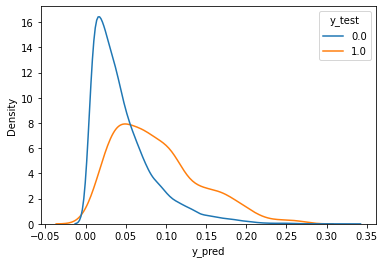

In [29]:
import pandas as pd
import seaborn as sns

sns.kdeplot(
    pd.DataFrame({"y_pred": y_pred, "y_test": y_test}),
    x="y_pred",
    hue="y_test",
    common_norm=False,
)
from ppp_prediction.corr import cal_binary_metrics

cal_binary_metrics(y_test.values, y_pred)

In [28]:
y_pred

array([0.0096304 , 0.01932999, 0.04352001, ..., 0.03718373, 0.08343857,
       0.01284842], dtype=float32)

{'AUC': 0.7486046248775498,
 'ACC': 0.6524812766850984,
 'Macro_F1': 0.4835577752550346,
 'Sensitivity': 0.726813880126183,
 'Specificity': 0.6481529512023416,
 'APR': 0.14372086625106173}

## test

In [ ]:
!pip install -U transformers

In [ ]:
import transtab

# load dataset by specifying dataset name
allset, trainset, valset, testset, cat_cols, num_cols, bin_cols = transtab.load_data(
    ["credit-g"]
)

In [ ]:
training_arguments = {
    "num_epoch": 50,
    "batch_size": 64,
    "lr": 1e-4,
    "eval_metric": "val_loss",
    "eval_less_is_better": True,
    "output_dir": "./checkpoint",
}

In [ ]:
# build classifier
model = transtab.build_classifier(cat_cols, num_cols, bin_cols)

# start training
transtab.train(model, trainset, valset, **training_arguments)

# make predictions, df_x is a pd.DataFrame with shape (n, d)
# return the predictions ypred with shape (n, 1) if binary classification;
# (n, n_class) if multiclass classification.
# ypred = transtab.predict(model, df_x)

In [ ]:
import torch
import numpy as np


def predict(
    clf,
    x_test,
    y_test=None,
    return_loss=False,
    eval_batch_size=256,
):
    """Make predictions by TransTabClassifier.

    Parameters
    ----------
    clf: TransTabClassifier
        the classifier model to make predictions.

    x_test: pd.DataFrame
            input tabular data.

    y_test: pd.Series
        target labels for input x_test. will be ignored if ``return_loss=False``.

    return_loss: bool
        set True will return the loss if y_test is given.

    eval_batch_size: int
        the batch size for inference.

    Returns
    -------
    pred_all: np.array
        if ``return_loss=False``, return the predictions made by TransTabClassifier.

    avg_loss: float
        if ``return_loss=True``, return the mean loss of the predictions made by TransTabClassifier.

    """
    clf.eval()
    pred_list, loss_list = [], []
    for i in range(0, len(x_test), eval_batch_size):
        bs_x_test = x_test.iloc[i : i + eval_batch_size]
        if y_test is not None:
            bs_y_test = y_test.iloc[i : i + eval_batch_size]
        with torch.no_grad():
            if y_test is not None:
                logits, loss = clf(bs_x_test, bs_y_test)
            else:
                logits, loss = clf(bs_x_test)

        if loss is not None:
            loss_list.append(loss.item())
        if logits.shape[-1] == 1:  # binary classification
            pred_list.append(logits.sigmoid().detach().cpu().numpy())
        else:  # multi-class classification
            pred_list.append(torch.softmax(logits, -1).detach().cpu().numpy())
    pred_all = np.concatenate(pred_list, 0)
    if logits.shape[-1] == 1:
        pred_all = pred_all.flatten()

    if return_loss:
        avg_loss = np.mean(loss_list)
        return avg_loss
    else:
        return pred_all

In [ ]:
model.load("./checkpoint")

x_test, y_test = testset[0]

ypred = transtab.predict(model, x_test=x_test)

In [ ]:
y_pred = predict(model, x_test)

In [ ]:
import seaborn as sns

sns.boxplot(x=y_test, y=y_pred)

In [ ]:
import pandas as pd

sns.kdeplot(
    pd.DataFrame({"y_pred": y_pred, "y_test": y_test}),
    x="y_pred",
    hue="y_test",
    common_norm=False,
)